### 카테고리 확률변수

 - 1~K까지 중에서 K개의 정수가 나올 수 있는 확률변수
 - 숫자값 : 클래스, 범주값, 카테고리라고 한다. 
 - ex) 주사위는 클래스의 숫자가 6개인 카테고리 확률분포의 값이다. 
 
###### 원핫인코딩( One-Hot-Encoding )

 - 스칼라로 이루어져있는 카테고리 값을 벡터로 변환
 

#### 벡터를 구성하는 원소의 제한조건

 
$x_i = \{ {^0_1}$
  
$sum^k_{k=1}x_k = 1$

 - 원소값 $x_k$ == 베르누이 확률변수 : 각각 1이 나올 확률을 나타내는 모수 $\mu_k$를 가진다.
 
#### 모수 벡터 ($mu_k$)의 제한조건

 $0\leq \mu_i \leq 1$
 
 $\sum^k_{k=1}\mu_k = 1$
 
 
----
### 카테고리 확률분포

 -  $Cat(x;\mu) = \prod^k_{k=1}\mu_k^{x_k}$
 
#### 카테고리분포의 모멘트


 - $E[x_k] = \mu_k$ : 기대값(1차모멘트)
    
 - $Var[x_k] = \mu_k(1-\mu_k)$ : 분산(2차모멘트)
 
---
### scipy를 이용한 카테고리분포 시뮬레이션

 - multinomial (다항분포)
    

In [1]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

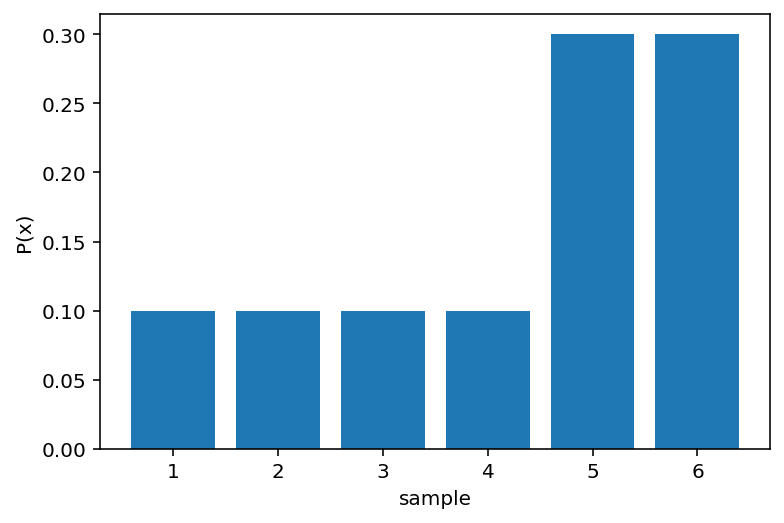

In [2]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel('sample')
plt.show()

In [3]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

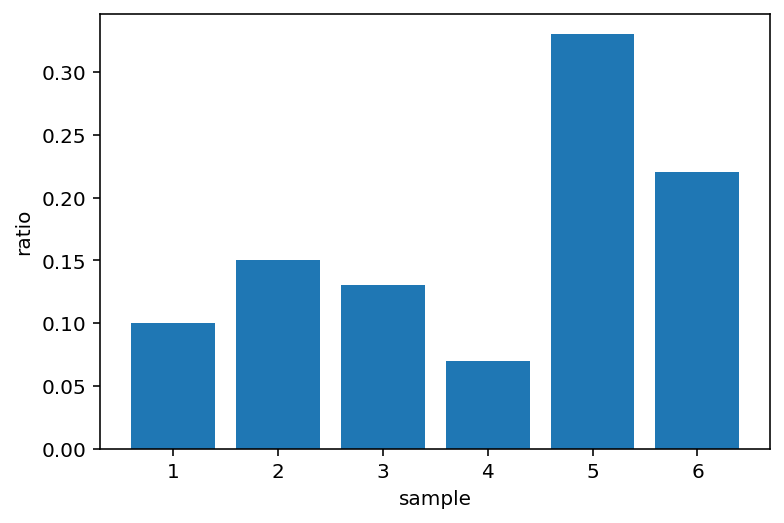

In [4]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.xlabel('sample')
plt.ylabel('ratio')
plt.show()

In [6]:
mu1 = [0.25, 0.25, 0.25, 0.25]
rv = sp.stats.multinomial(1, mu1)

#### 연습문제 8.3.2

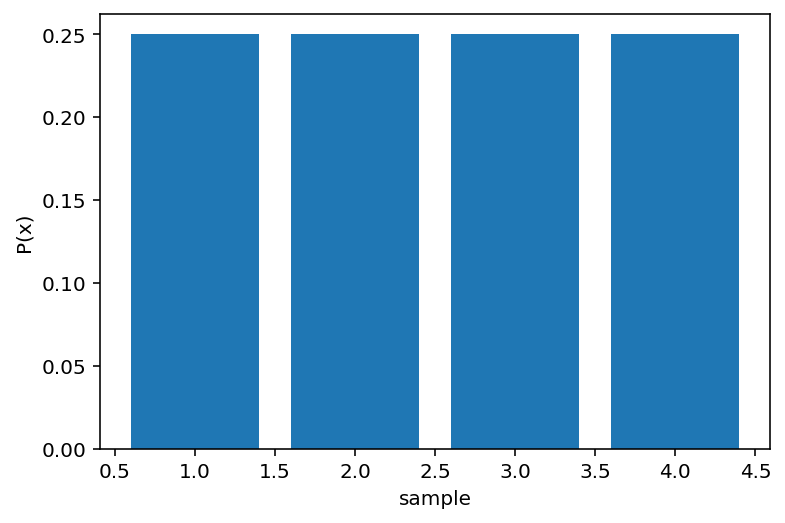

In [8]:
xx = np.arange(1, 5)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel('sample')
plt.show()

In [9]:
mu2 = [0.3, 0.3, 0.2, 0.2]
rv = sp.stats.multinomial(1, mu2)

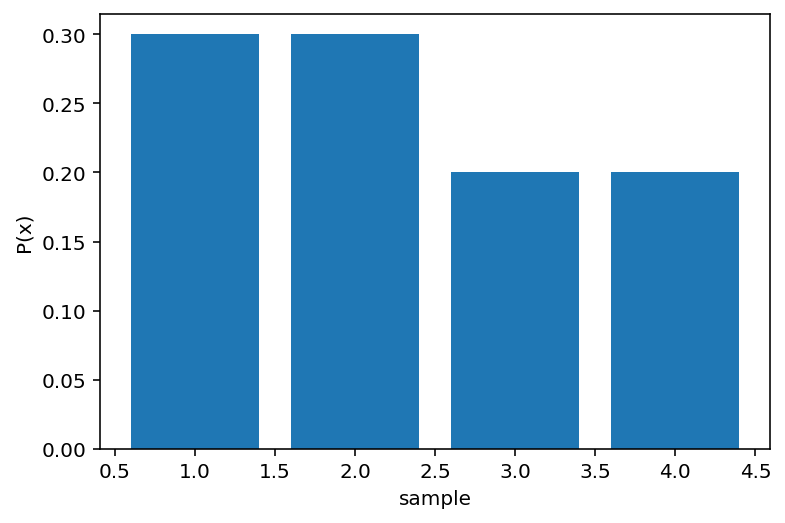

In [10]:
xx = np.arange(1, 5)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel('sample')
plt.show()

---
### 다중분류문제

 - 카테고리분포를 사용하여 범주값 데이터 모형을 만들 수 있다. 
 - decision tree $\rightarrow$ random forest


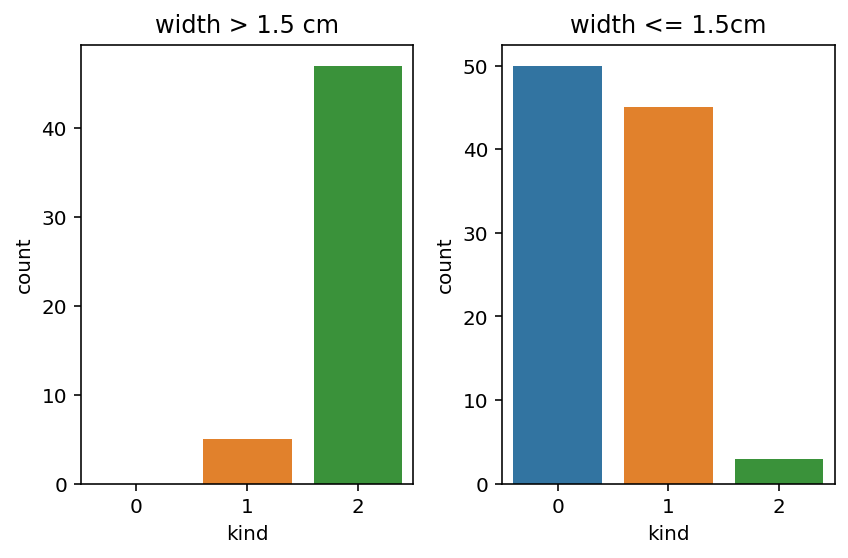

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['kind'] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x='kind', data=df1, ax=ax[0]).set_title('width > 1.5 cm')
sns.countplot(x='kind', data=df2, ax=ax[1]).set_title('width <= 1.5cm')

plt.tight_layout()
plt.show()

---
### 다항분포

 - 주사위를 N번 던져서 각 면이 나오는 횟수 집합의 분포
 
 pmf))
 
 $Mu(x;N,\mu) = (^N_x) \prod^k_{k=1}\mu_k^{x_k}$
 
---
#### 카테고리분포의 모멘트


 - $E[x_k] = N\mu_k$ : 기대값(1차모멘트)
    
 - $Var[x_k] = N\mu_k(1-\mu_k)$ : 분산(2차모멘트)
 
---
#### 다항분포 시뮬레이션

In [12]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

np.random.seed(0)
X = rv.rvs(100)
X[:10]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

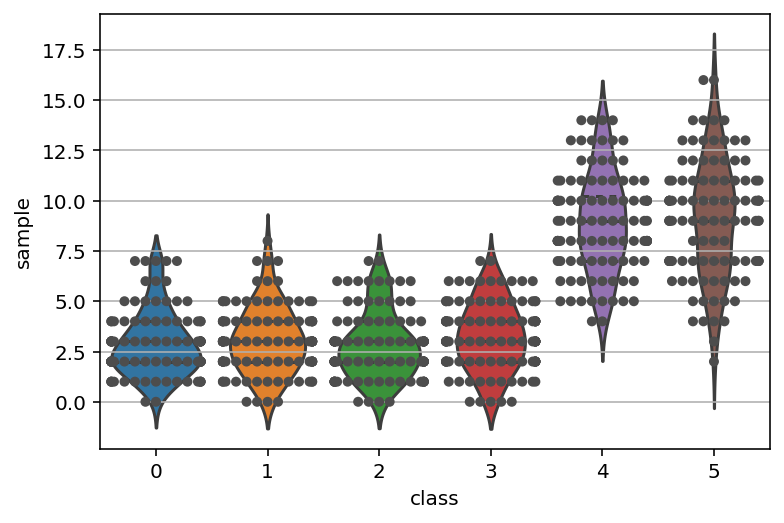

In [15]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['practice', 'class', 'sample']

plt.grid()
sns.violinplot(x='class', y='sample', data=df, inner='quartile')
sns.swarmplot(x='class', y='sample', data=df, color=".3")
plt.show()

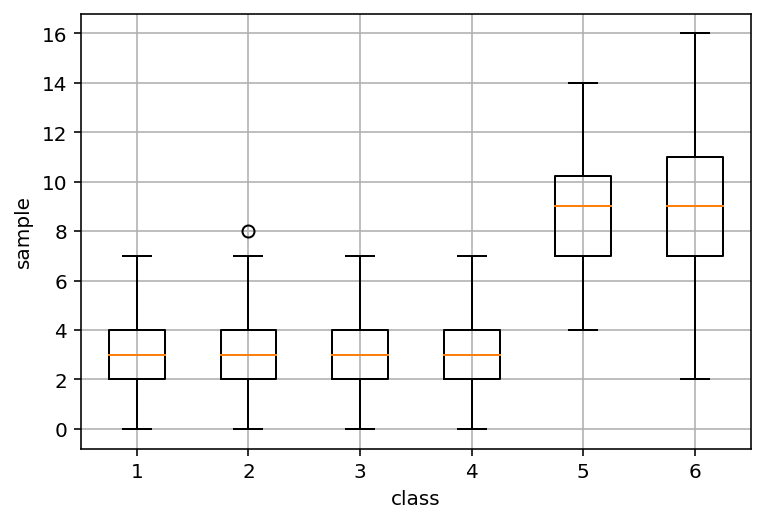

In [19]:
# boxplot

plt.boxplot(X)
plt.xlabel('class')
plt.ylabel('sample')
plt.grid()
plt.show()

#### boxplot

 - 빨간줄 : 중앙값
 - 박스의 위, 아래 : 1분위수, 3분위수
     * 분위수란? 절반으로 나눴을 때 가운데 값.
     